# Turnpike example (example from Trélat)
## Definition of the optimal control problem


$$
    \left\{
    \begin{array}{l}
        \min 0.5\int_{0}^{1}\left((x_1(t)-1)^2+(x_2(t)-1)^2+(u(t)-2)^2\right)t_f dt,\\
        \dot{x}_1(t) = x_2(t)t_f\\
        \dot{x}_2(t) = (1-x_1(t)+x_2^3(t)+u(t))t_f\\
        x_1(0) = 1,\, x_2(0) = 1\\
        x_1(1) = 3,\, x_2(1) = 0
    \end{array}
    \right.
$$
$\varepsilon = 1/t_f$

### Initialisation

In [1]:
using LinearAlgebra, NLsolve
using Plots
include("Flow.jl")      #


# Parameters
t0 = 0.
tf = 40.
s0 = 0.
sf = 1.
x0 = [1.,1.]
xf = [3.,0.]
xbar = [2.,0]
pbar = [-1.,-1]
y0 = [xbar;pbar]
λ = 0.
par0 = [x0,xf,xbar,λ,tf,s0,sf] 
par = [tf]

1-element Array{Float64,1}:
 40.0

### true hamiltonian

In [2]:
function H(x,p,u,par)
    x1 = x[1]; x2 = x[2]
    p1 = p[1]; p2 = p[2]
    return (-0.5*((x1-1)^2 + (x2-1)^2 + (u-2)^2) + x2*p1 + (1 - x1 + x2^3 + u)*p2)*par[1]
end

control(x,p) = 2. + p[2]

true_H(x,p,par) = H(x,p,control(x,p),par)

true_H (generic function with 1 method)

## Flows

In [3]:
f = Flow(true_H)

f (generic function with 2 methods)

## Shooting function

In [4]:
function shoot_par(y,par; optionsODE = Dict())
    # y = [p(0), p(1)]
    x0,xf,xbar,λ, tf = par
    z0 = [λ*x0+(1-λ)*xbar ; y[1:2]]
    #println("z0 = ", z0)
    zf1 = f(0.,z0,0.5,λ=[tf], optionsODE=optionsODE)
    #println("zf1 = ", zf1)
    z0 = [λ*xf+(1-λ)*xbar ; y[3:4]]
    #println("z0 = ", z0)
    zf2 = f(1.,z0,0.5,λ=[tf],optionsODE=optionsODE)
    s = zf1 - zf2
    return s
end

y0 = [pbar;pbar]
par0[4] = 0.
par0[5] = 10.
println("par0 = ", par0)
println("y0 = ", y0)
println("shoot_par(y0,par0) = ", shoot_par(y0,par0))

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]
y0 = [-1.0, -1.0, -1.0, -1.0]
shoot_par(y0,par0) = [0.0, 0.0, 0.0, 0.0]


In [5]:
println("par0 = ", par0)
shoot(y) = shoot_par(y,par0)
println("y0 = ", y0)
println("shoot(y0) = ", shoot(y0))
#nlsolve(shoot,y0)
n = size(y0,1)
nl_sol = nlsolve(shoot, y0)
ybar = nl_sol.zero
println("par0 = ", par0)

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]
y0 = [-1.0, -1.0, -1.0, -1.0]
shoot(y0) = [0.0, 0.0, 0.0, 0.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]


In [6]:
par0[4] = 0.05
par0[5] = 10.
println("par0 = ", par0)
println("y0 = ", y0)
#optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-3),(:abstol,1.e-6)])
optionsODE = Dict()
shoot(y) = shoot_par(y,par0,optionsODE = optionsODE)
println("shoot(y0) = ", shoot(y0))
nl_sol = nlsolve(shoot, y0)
y_sol = nl_sol.zero

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.05, 10.0, 0.0, 1.0]
y0 = [-1.0, -1.0, -1.0, -1.0]
shoot(y0) = [-1.0095065976776456, 0.16490871834979492, -0.012364531801086542, -1.003480295124495]


4-element Array{Float64,1}:
 -0.922623519468114
 -1.049848621632985
 -0.9027010765185491
 -1.020535159983963

tf = 10.0

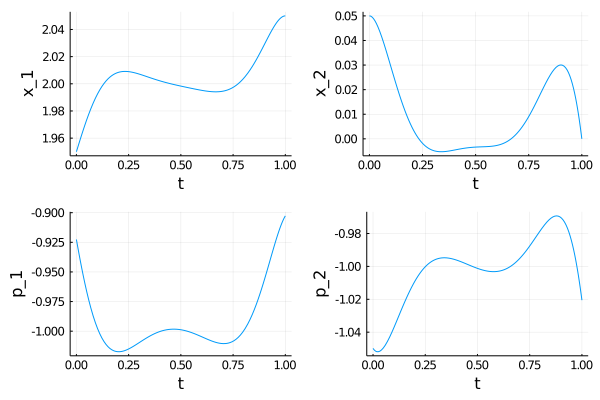

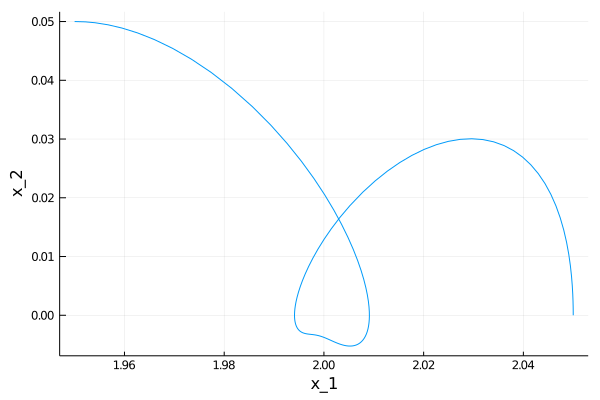

In [7]:
# Graphics
λ = par0[4]
tf = par0[5]
println("tf = ", tf)
z0 = [λ*x0+(1-λ)*xbar ; y_sol[1:2]]
ode_sol = f((0.,0.5),z0,λ=[tf], optionsODE=optionsODE)
T1 = ode_sol.t
X1 = ode_sol[1:2,:]
P1 = ode_sol[3:4,:]

#U1 = 2 .+ P1[2,:]
z0 = [λ*xf+(1-λ)*xbar ; y_sol[3:4]]
ode_sol = f((1.,0.5),z0,λ=[tf], optionsODE=optionsODE)
T2 = ode_sol.t
X2 = ode_sol[1:2,:]
P2 = ode_sol[3:4,:]
T2 = T2[end:-1:1]
X2 = X2[:,end:-1:1]
P2 = P2[:,end:-1:1]
#U2 = 2 .+ P2[2,:]
T = [T1;T2]
X = [X1 X2]
P = [P1 P2]
#U = [U1 ; U2]
px1 = plot(T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
px2 = plot(T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
pp1 = plot(T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
pp2 = plot(T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
p_phase = plot(X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
#pu = plot(T,U, xlabel = "t", ylabel = "u", label = "u")
display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))

## Homotopy on boundary conditions

In [8]:
include("Homotopy.jl")
tf = 10.
# tf = 40 dt < dtmin
par0[5] = tf
optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-12),(:abstol,1.e-12)])
S(y,λ) = shoot_par(y,[par0[1:3];λ;par0[5]], optionsODE = optionsODE)   # shooting homotopy
println("S(y0,0.0) = ", S(y0,0.0))
println("par0 = ", par0)
h = Path(S)

S(y0,0.0) = [0.0, 0.0, 0.0, 0.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.05, 10.0, 0.0, 1.0]


(::var"#H#17"{var"#H#15#18"{Array{Any,1},typeof(S),var"#jac#16"}}) (generic function with 1 method)

In [9]:
λ0   = 0.
λf   = 1
println("y0 = ", y0)
path1 = h(y0, λ0, λf);

y0 = [-1.0, -1.0, -1.0, -1.0]

     Calls  |f(x,pars)|     |x|             Homotopic param 

         1  0.00000000e+00  2.00000000e+00  0.00000000e+00
         2  1.65924476e-13  1.99527339e+00  4.63092298e-03
         3  5.61825003e-12  1.98211394e+00  1.77903469e-02
         4  4.60282185e-11  1.96498881e+00  3.56280963e-02
         5  1.67820759e-10  1.94614350e+00  5.65042292e-02
         6  5.59477241e-10  1.92591011e+00  8.10485246e-02
         7  1.44019965e-09  1.90634381e+00  1.08226327e-01
         8  3.26223007e-09  1.88901301e+00  1.37812062e-01
         9  6.42471494e-09  1.87594056e+00  1.69053396e-01
        10  1.14433027e-08  1.86892139e+00  2.01497200e-01
        11  1.23001808e-12  1.86959922e+00  2.34589529e-01
        12  9.57245118e-09  1.87925648e+00  2.67917710e-01
        13  1.34971448e-12  1.89874402e+00  3.01099158e-01
        14  1.56175756e-12  1.92845021e+00  3.33842830e-01
        15  1.64035207e-12  1.96831168e+00  3.65916133e-01
        16  1.93304704

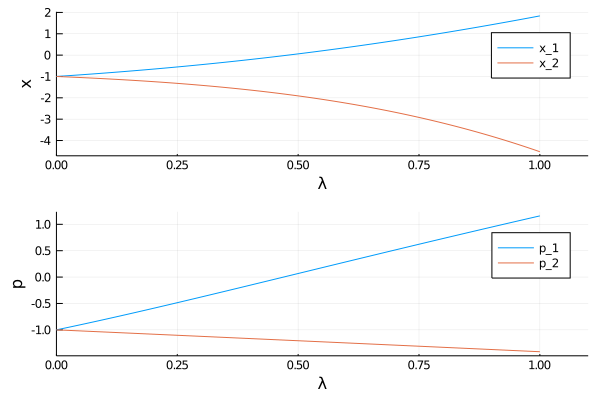

In [10]:
# Plots
path = path1
ss = path.t
px = plot(path,vars=[(5,1) (5,2)], xlabel = "λ", ylabel = "x", label = ["x_1" "x_2"], fmt=:png)
pp = plot(path,vars=[(5,3) (5,4)], xlabel = "λ", ylabel = "p", label = ["p_1" "p_2"], fmt=:png)

display(plot(px, pp, layout = (2,1)))



#ode_sol = f((t0, tf), [x0;p0])
#T = ode_sol.t
#X = ode_sol[1:2,:]
#P = ode_sol[3:4,:]
#control_vect(X,P) = P[2,:]
#U = control_vect(X, P)

#px = plot(ode_sol, vars = [1,2], xlabel = "t", ylabel = "x", label = ["x_1" "x_2"])
#pp = plot(ode_sol, vars = [3,4], xlabel = "t", ylabel = "p", label = ["p_1" "p_2"])
# Control vars = (control,0,1,2,3,4) apply the fonction control on the 5 variables t,x_1,x_2,p_1 and p_2
#control(t,x1,x2,p1,p2) = (t,control([x1,x2],[p1,p2]))
#pu = plot(ode_sol, vars = (control,0,1,2,3,4), xlabel = "t", ylabel = "u", label = "u")
#pu = plot(T, U, ylabel = "u", label = "u")
#display(plot(px, pp, pu, layout = (3,1)))

y_sol = [-0.5157240055275881, -1.3540776840783477, -0.44645536236010547, -1.1103084783096422] i = 32
S(y_sol,λ) = [1.3530019327134823e-9, 1.8363408571531181e-9, 5.314504614162274e-9, 7.62791585451339e-9]
y_sol = [0.24546153763395373, -2.120901008264749, 0.21094430590232027, -1.2329785289030408] i = 64
S(y_sol,λ) = [-1.567190821560871e-12, 1.185287978877625e-12, 1.0178524689763435e-12, -1.4732659536775827e-12]
y_sol = [1.0904109523963539, -3.2648504401762666, 0.7618604003584674, -1.3369212646643225] i = 96
S(y_sol,λ) = [-2.8741453661496053e-12, 1.4813011928183073e-12, 5.202505093393484e-13, -4.694911126534862e-12]
y_sol = 

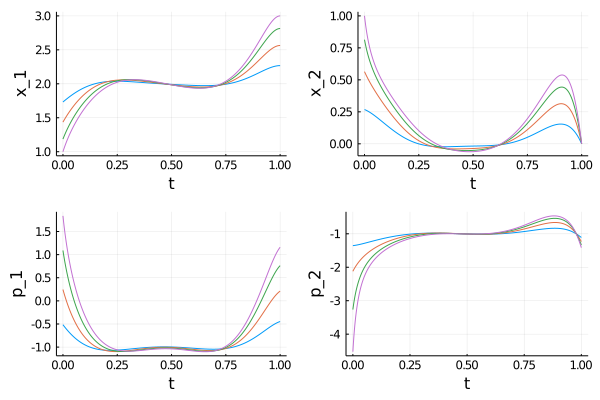

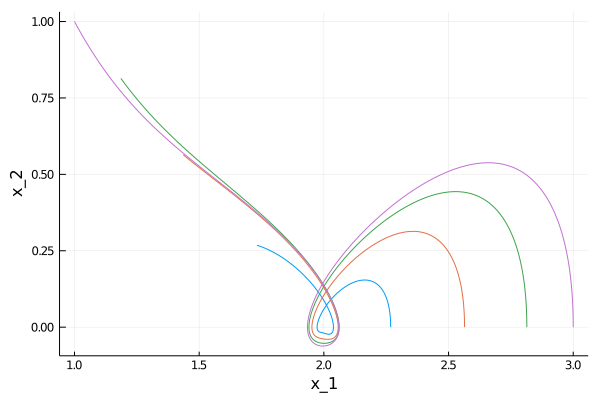

[1.8380780571396929, -4.524744727246662, 1.159776180023537, -1.414567989884902] i = 129
S(y_sol,λ) = [-3.771205570046732e-12, -3.685315941304168e-13, -4.0456527017340704e-13, -8.804068585277491e-12]


In [11]:
# Graphics
px1 = plot()
px2 = plot()
pp1 = plot()
pp2 = plot()
p_phase = plot()
n_path, m_path = size(path[:,:])
tf = par0[5]
step = m_path ÷ 4
Ind = [[i*step for i in 1:3]; m_path]
for i in Ind
    y_sol = path[1:4,i]
    λ = path[5,i]
    println("y_sol = ", y_sol," i = ",i)
    println("S(y_sol,λ) = ", S(y_sol,λ))
    z0 = [λ*x0+(1-λ)*xbar ; y_sol[1:2]]
    ode_sol = f((0.,0.5),z0,λ=[tf], optionsODE=optionsODE)
    T1 = ode_sol.t
    X1 = ode_sol[1:2,:]
    P1 = ode_sol[3:4,:]

    #U1 = 2 .+ P1[2,:]
    z0 = [λ*xf+(1-λ)*xbar ; y_sol[3:4]]
    ode_sol = f((1.,0.5),z0,λ=[tf], optionsODE=optionsODE)
    T2 = ode_sol.t
    X2 = ode_sol[1:2,:]
    P2 = ode_sol[3:4,:]
    T2 = T2[end:-1:1]
    X2 = X2[:,end:-1:1]
    P2 = P2[:,end:-1:1]
    #U2 = 2 .+ P2[2,:]
    T = [T1;T2]
    X = [X1 X2]
    P = [P1 P2]
    #U = [U1 ; U2]
    px1 = plot!(px1,T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
    px2 = plot!(px2,T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
    pp1 = plot!(pp1,T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
    pp2 = plot!(pp2,T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
    p_phase = plot!(p_phase,X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
end


display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))
#println("tf = ",tf)

## Homotopy on the final time tf

In [12]:
println(y0)
par0[4] = 1.
println("par0 = ", par0)
# Rosenbrock23() Rodas5()
#optionsODE = Dict([(:algo,Rosenbrock23()),(:reltol,1.e-3),(:abstol,1.e-6)])
#optionsODE = Dict([(:algo,radau()),(:reltol,1.e-12),(:abstol,1.e-12)])
#optionsODE = Dict()
optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-12),(:abstol,1.e-12)])
S(y,tf) = shoot_par(y,[par0[1:4];tf],optionsODE=optionsODE)   # shooting homotopy

h = Path(S)
tf0   = 10.
tff   = 60.
y_sol = [1.8380780571396929, -4.524744727246662, 1.159776180023537, -1.414567989884902]
println("y_sol = ", y_sol)
println("S(y_sol,λ0) = ", S(y_sol,tf0))
path2 = h(y_sol, tf0, tff);
#path = h(y0, λ0, λf);

[-1.0, -1.0, -1.0, -1.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 1.0, 10.0, 0.0, 1.0]
y_sol = [1.8380780571396929, -4.524744727246662, 1.159776180023537, -1.414567989884902]
S(y_sol,λ0) = [-6.749538927763865e-9, -1.6375494807374658e-8, -4.198990266601754e-9, -1.9432270237373928e-8]

     Calls  |f(x,pars)|     |x|             Homotopic param 

         1  2.66262606e-08  5.21516339e+00  1.00000000e+01
         2  2.66258834e-08  5.21514408e+00  1.00189728e+01
         3  2.66260526e-08  5.21506246e+00  1.01067429e+01
         4  2.66317756e-08  5.21495739e+00  1.02466629e+01
         5  2.66470467e-08  5.21487096e+00  1.04086188e+01
         6  2.67114442e-08  5.21480906e+00  1.06115510e+01
         7  2.68622965e-08  5.21479006e+00  1.08438394e+01
         8  2.72323733e-08  5.21481945e+00  1.11123228e+01
         9  2.79589162e-08  5.21489496e+00  1.14142206e+01
        10  2.93828716e-08  5.21500641e+00  1.17556431e+01
        11  3.22158673e-08  5.21513664e+00  1.21441486e+0

y_sol = [1.83420235949326, -4.526365565485668, 1.1595901468526961, -1.4135758061072843] i = 25
S(y_sol,λ) = [-7.2092078973184925e-9, -1.6625255554181262e-8, -4.5916781488131164e-9, -2.079051908410179e-8]
y_sol = [1.8360877461579024, -4.525741835120337, 1.160324441002487, -1.414236062242376] i = 50
S(y_sol,λ) = [4.048514545829107e-8, -3.4034564375118315e-8, 3.31503680062184e-9, -5.817358361692726e-8]
y_sol = [1.8360045382313506, -4.525775416244769, 1.1603156839316209, -1.4142134553450543] i = 75
S(y_sol,λ) = [-3.116578106698853e-10, 3.632070628414516e-10, 4.668648800887354e-10, -3.0677771434284296e-10]
y_sol = [1.836004842466917, -4.525775316049594, 1.1603158042301698, -1.4142135623728784] i = 102
S(y_sol,λ) = [7.541567912383584e-7, 2.8522842329603946e-7, -2.891812138638983e-7

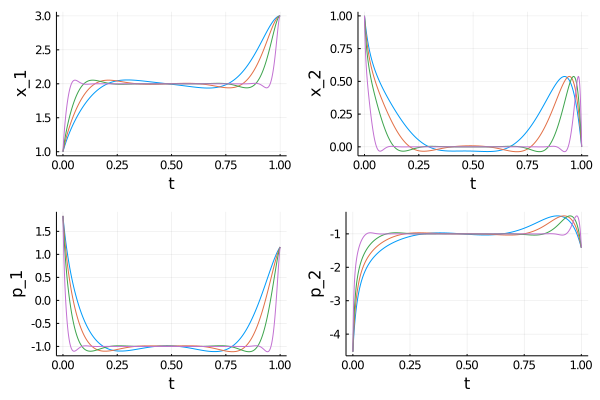

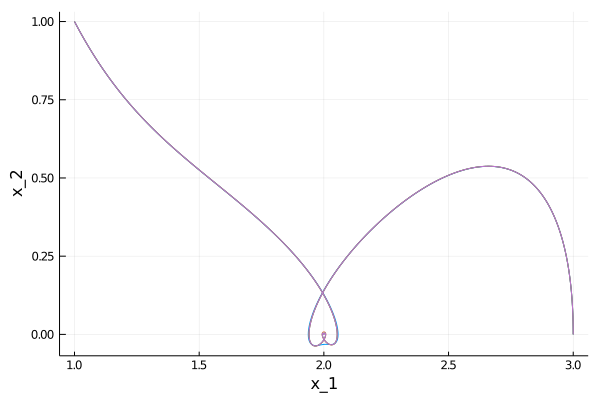

, 2.4682971222489414e-9]
path[:,1] = [1.8380780571396929, -4.524744727246662, 1.159776180023537, -1.414567989884902, 10.0]

In [13]:
# Graphics
path = path2
px1 = plot()
px2 = plot()
pp1 = plot()
pp2 = plot()
p_phase = plot()
n_path, m_path = size(path[:,:])
step = m_path ÷ 4
Ind = [[i*step for i in 1:3]; m_path]
λ = par0[4]
for i in Ind
    y_sol = path[1:4,i]
    tf = path[5,i]
    println("y_sol = ", y_sol," i = ",i)
    println("S(y_sol,λ) = ", S(y_sol,tf))
    z0 = [λ*x0+(1-λ)*xbar ; y_sol[1:2]]
    ode_sol = f((0.,0.5),z0,λ=[tf], optionsODE=optionsODE)
    T1 = ode_sol.t
    X1 = ode_sol[1:2,:]
    P1 = ode_sol[3:4,:]

    #U1 = 2 .+ P1[2,:]
    z0 = [λ*xf+(1-λ)*xbar ; y_sol[3:4]]
    ode_sol = f((1.,0.5),z0,λ=[tf], optionsODE=optionsODE)
    T2 = ode_sol.t
    X2 = ode_sol[1:2,:]
    P2 = ode_sol[3:4,:]
    T2 = T2[end:-1:1]
    X2 = X2[:,end:-1:1]
    P2 = P2[:,end:-1:1]
    #U2 = 2 .+ P2[2,:]
    T = [T1;T2]
    X = [X1 X2]
    P = [P1 P2]
    #U = [U1 ; U2]
    px1 = plot!(px1,T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
    px2 = plot!(px2,T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
    pp1 = plot!(pp1,T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
    pp2 = plot!(pp2,T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
    p_phase = plot!(p_phase,X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
end


display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))
#println("tf = ",tf)
print("path[:,1] = ", path[:,1])

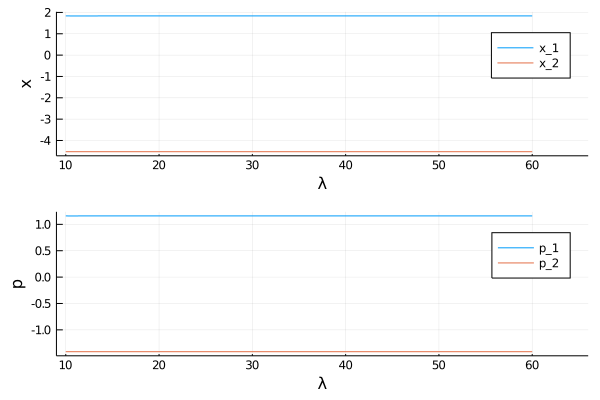

In [14]:
# Plots
ss = path.t
px = plot(path,vars=[(5,1) (5,2)], xlabel = "λ", ylabel = "x", label = ["x_1" "x_2"], fmt=:png)
pp = plot(path,vars=[(5,3) (5,4)], xlabel = "λ", ylabel = "p", label = ["p_1" "p_2"], fmt=:png)

display(plot(px, pp, layout = (2,1)))

[return to the presentation](../slides/main.pdf)